# Binary Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
#loadong the data
df=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\Demo Datasets\breast-cancer-wisconsin.data.txt')

In [3]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

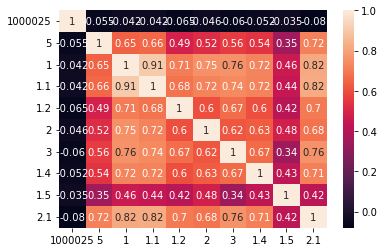

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
col_names=['Id','Clum_thickness','Uniformality_cell_size','uniformity_cell_shape','marginal_Adhesion',
           'single_apithelial_cell_size','Bare_nuclei','bland_chromtin','normal_nucleoli','mutoses',
          'class']

In [8]:
df.columns=col_names

In [9]:
df.head()

,Id,Clum_thickness,Uniformality_cell_size,uniformity_cell_shape,marginal_Adhesion,single_apithelial_cell_size,Bare_nuclei,bland_chromtin,normal_nucleoli,mutoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           698 non-null    int64 
 1   Clum_thickness               698 non-null    int64 
 2   Uniformality_cell_size       698 non-null    int64 
 3   uniformity_cell_shape        698 non-null    int64 
 4   marginal_Adhesion            698 non-null    int64 
 5   single_apithelial_cell_size  698 non-null    int64 
 6   Bare_nuclei                  698 non-null    object
 7   bland_chromtin               698 non-null    int64 
 8   normal_nucleoli              698 non-null    int64 
 9   mutoses                      698 non-null    int64 
 10  class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [11]:
df.isnull().sum()

Id                             0
Clum_thickness                 0
Uniformality_cell_size         0
uniformity_cell_shape          0
marginal_Adhesion              0
single_apithelial_cell_size    0
Bare_nuclei                    0
bland_chromtin                 0
normal_nucleoli                0
mutoses                        0
class                          0
dtype: int64

In [12]:
df.drop('Id',axis=1,inplace=True)

In [13]:
df.head()

,Clum_thickness,Uniformality_cell_size,uniformity_cell_shape,marginal_Adhesion,single_apithelial_cell_size,Bare_nuclei,bland_chromtin,normal_nucleoli,mutoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [14]:
for col in df.columns:
    print(df[col].value_counts())

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clum_thickness, dtype: int64
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformality_cell_size, dtype: int64
1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: uniformity_cell_shape, dtype: int64
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_Adhesion, dtype: int64
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_apithelial_cell_size, dtype: int64
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromtin, dtype: int64
1     442
10     

In [15]:
df['Bare_nuclei']=pd.to_numeric(df['Bare_nuclei'],errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clum_thickness               698 non-null    int64  
 1   Uniformality_cell_size       698 non-null    int64  
 2   uniformity_cell_shape        698 non-null    int64  
 3   marginal_Adhesion            698 non-null    int64  
 4   single_apithelial_cell_size  698 non-null    int64  
 5   Bare_nuclei                  682 non-null    float64
 6   bland_chromtin               698 non-null    int64  
 7   normal_nucleoli              698 non-null    int64  
 8   mutoses                      698 non-null    int64  
 9   class                        698 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [17]:
df.isnull().sum()

Clum_thickness                  0
Uniformality_cell_size          0
uniformity_cell_shape           0
marginal_Adhesion               0
single_apithelial_cell_size     0
Bare_nuclei                    16
bland_chromtin                  0
normal_nucleoli                 0
mutoses                         0
class                           0
dtype: int64

In [18]:
df['class'].value_counts()/np.float(len(df))

C:\Users\Dell\AppData\Local\Temp/ipykernel_11336/4136239889.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['class'].value_counts()/np.float(len(df))


2    0.654728
4    0.345272
Name: class, dtype: float64

In [19]:
df['Bare_nuclei'].value_counts()/np.float(len(df))

C:\Users\Dell\AppData\Local\Temp/ipykernel_11336/611755924.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Bare_nuclei'].value_counts()/np.float(len(df))


1.0     0.574499
10.0    0.189112
2.0     0.042980
5.0     0.042980
3.0     0.040115
8.0     0.030086
4.0     0.027221
9.0     0.012894
7.0     0.011461
6.0     0.005731
Name: Bare_nuclei, dtype: float64

In [20]:
print(round(df.describe(),2))

       Clum_thickness  Uniformality_cell_size  uniformity_cell_shape  \
count          698.00                  698.00                 698.00   
mean             4.42                    3.14                   3.21   
std              2.82                    3.05                   2.97   
min              1.00                    1.00                   1.00   
25%              2.00                    1.00                   1.00   
50%              4.00                    1.00                   1.00   
75%              6.00                    5.00                   5.00   
max             10.00                   10.00                  10.00   

       marginal_Adhesion  single_apithelial_cell_size  Bare_nuclei  \
count             698.00                       698.00       682.00   
mean                2.81                         3.22         3.55   
std                 2.86                         2.22         3.65   
min                 1.00                         1.00         1.00   
2

In [21]:
corr=df.corr()
corr['class'].sort_values(ascending=False)

class                          1.000000
Bare_nuclei                    0.822563
uniformity_cell_shape          0.818794
Uniformality_cell_size         0.817772
bland_chromtin                 0.756732
Clum_thickness                 0.716509
normal_nucleoli                0.712067
marginal_Adhesion              0.696605
single_apithelial_cell_size    0.682618
mutoses                        0.423008
Name: class, dtype: float64

<AxesSubplot:>

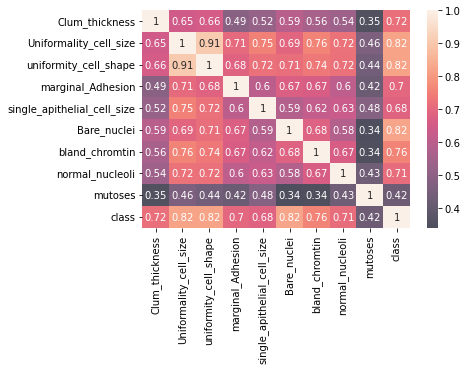

In [22]:
sns.heatmap(df.corr(),annot=True,alpha=0.7)

as you saw in heatmap bare nuclei ,uniformality cell size,uniformity cell shape is correlated with class with 82% correlation

In [23]:
df.columns

Index(['Clum_thickness', 'Uniformality_cell_size', 'uniformity_cell_shape',
       'marginal_Adhesion', 'single_apithelial_cell_size', 'Bare_nuclei',
       'bland_chromtin', 'normal_nucleoli', 'mutoses', 'class'],
      dtype='object')

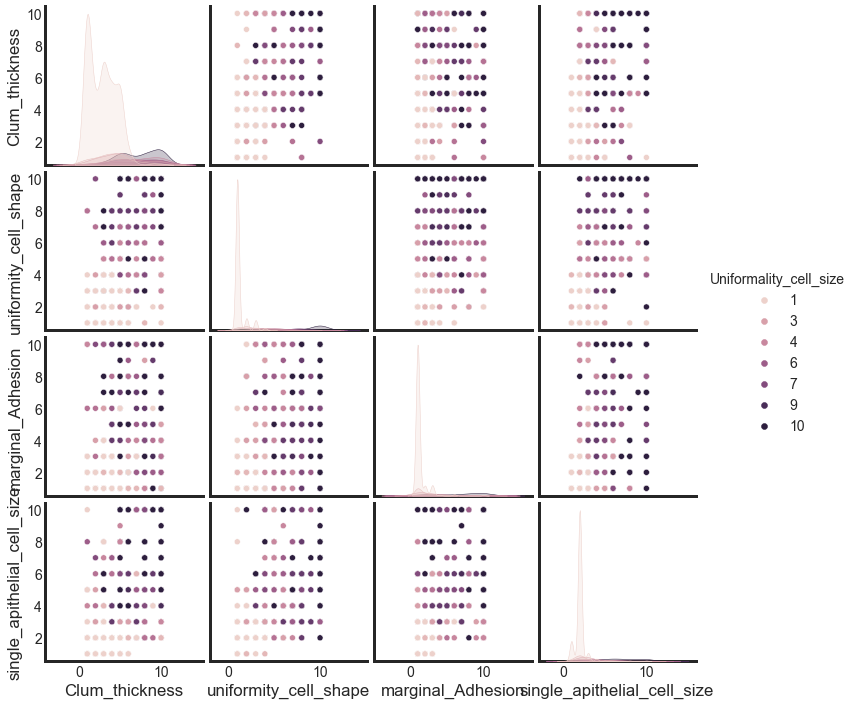

In [24]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.pairplot(df[[df.columns[0],df.columns[1],df.columns[2],df.columns[3],df.columns[4]]],hue=df.columns[1])

In [25]:
df.skew()

Clum_thickness                 0.593369
Uniformality_cell_size         1.231035
uniformity_cell_shape          1.159800
marginal_Adhesion              1.522333
single_apithelial_cell_size    1.709935
Bare_nuclei                    0.987779
bland_chromtin                 1.098497
normal_nucleoli                1.420086
mutoses                        3.557603
class                          0.652262
dtype: float64

In [26]:
X=df.drop(['class'],axis=1)
y=df['class']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape

(558, 9)

In [29]:
X_test.shape

(140, 9)

In [30]:
for df1 in [X_train,X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median,inplace=True)

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
X_train.isnull().sum()

Clum_thickness                 0
Uniformality_cell_size         0
uniformity_cell_shape          0
marginal_Adhesion              0
single_apithelial_cell_size    0
Bare_nuclei                    0
bland_chromtin                 0
normal_nucleoli                0
mutoses                        0
dtype: int64

In [32]:
X_test.isnull().sum()

Clum_thickness                 0
Uniformality_cell_size         0
uniformity_cell_shape          0
marginal_Adhesion              0
single_apithelial_cell_size    0
Bare_nuclei                    0
bland_chromtin                 0
normal_nucleoli                0
mutoses                        0
dtype: int64

In [33]:
cols=X_train.columns

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
X_train=pd.DataFrame(X_train,columns=[cols])

In [37]:



X_test=pd.DataFrame(X_test,columns=[cols])

In [38]:
#KNN deployment
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#knn method with neighbour value 3
knn=KNeighborsClassifier(n_neighbors=3)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred=knn.predict(X_test)

In [42]:
y_pred


array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
#test Accuraccy
print("Model accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.9714


In [45]:
y_pred_train=knn.predict(X_train)

In [46]:
#knn method with neighbor value 4
knn2=KNeighborsClassifier(n_neighbors=4)

In [47]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y1_pred=knn2.predict(X_test)

In [49]:
y1_pred

array([4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4], dtype=int64)

In [50]:
#test Accuraccy
print("Model accuracy score of test model (neighbors=4): {0:0.4f}".format(accuracy_score(y_test,y1_pred)))

Model accuracy score of test model (neighbors=4): 0.9786


In [51]:
y1_train_pred=knn2.predict(X_train)

In [52]:
#tran Accuraccy
print("Model accuracy score pf train model(neighbors=4): {0:0.4f}".format(accuracy_score(y_train,y1_train_pred)))

Model accuracy score pf train model(neighbors=4): 0.9713


In [53]:
#knn method neighbors value of 5
knn3=KNeighborsClassifier(n_neighbors=5)

In [54]:
knn3.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y2_pred=knn3.predict(X_test)

In [56]:
#test Accuraccy
print("Model accuracy score of test model(neighbors=5): {0:0.4f}".format(accuracy_score(y_test,y2_pred)))

Model accuracy score of test model(neighbors=5): 0.9714


In [57]:
y2_train_pred=knn3.predict(X_train)

In [58]:
#train Accuraccy
print("Model accuracy score of train model(neighbors=5): {0:0.4f}".format(accuracy_score(y_train,y2_train_pred)))

Model accuracy score of train model(neighbors=5): 0.9749


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
cm=confusion_matrix(y_test,y2_pred)

In [65]:
print("Confusion matrix\n\n",cm)

Confusion matrix

 [[83  2]
 [ 2 53]]


In [63]:
print("\nTrue positives =",cm[0,0])
print("\nTrue Negative =",cm[1,1])
print("\nFalse positives",cm[0,1])#type 1 error
print("\nFalse Negatives",cm[1,0])#type 2 error


True positives = 85

True Negative = 52

False positives 0

False Negatives 3


In [70]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [72]:
X_test.shape

(140, 9)